# Activity 2.1 : Convolutional Neural Network

**Name:** Tacsay, Marie Emmanuelle T.
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [26]:
from __future__ import print_function
import tensorflow 
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [28]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


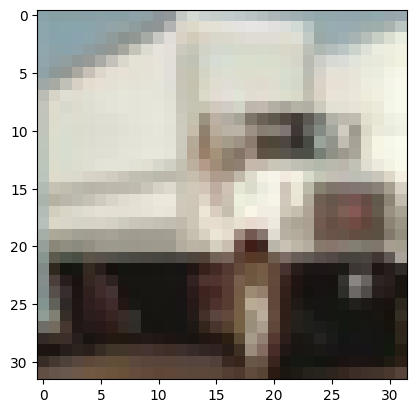

In [29]:
print(y_train[444])
plt.imshow(x_train[444]);

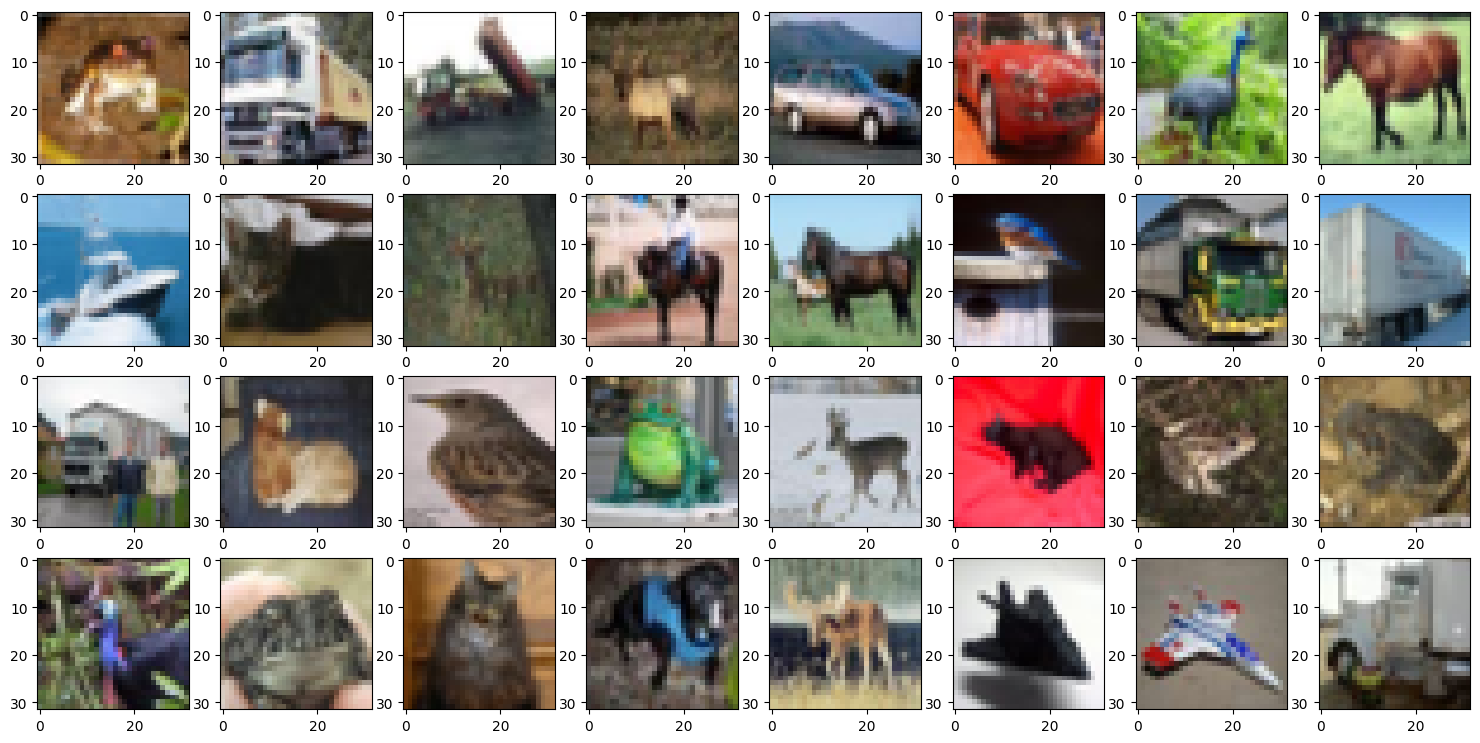

In [30]:
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(x_train[i])

In [31]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [32]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [34]:
model = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (5, 5), strides = (2,2)))
model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [35]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2928 - loss: 1.9148 - val_accuracy: 0.4577 - val_loss: 1.4873
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4650 - loss: 1.4843 - val_accuracy: 0.5420 - val_loss: 1.2994
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5098 - loss: 1.3595 - val_accuracy: 0.5509 - val_loss: 1.2431
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5401 - loss: 1.2883 - val_accuracy: 0.5883 - val_loss: 1.1769
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5636 - loss: 1.2347 - val_accuracy: 0.5552 - val_loss: 1.2650
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5712 - loss: 1.2012 - val_accuracy: 0.6016 - val_loss: 1.1416
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5876 - loss: 1.1667 - val_accuracy: 0.5643 - val_loss: 1.2145
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5976 - loss: 1.1466 - 

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0217217206954956
Test accuracy: 0.6477000117301941


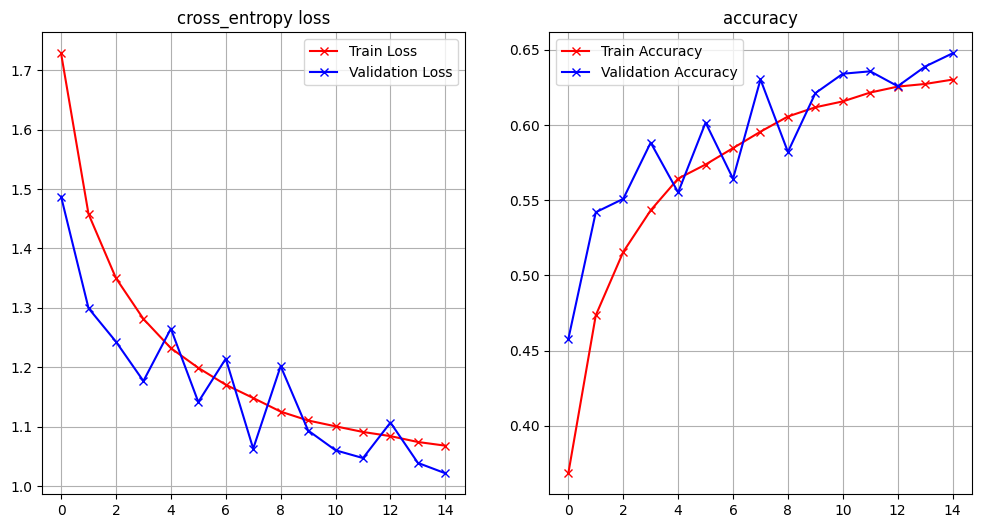

In [37]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [39]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [41]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (1,1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (1,1)))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (1,1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

In [42]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,426 (907.91 KB)

 Trainable params: 232,426 (907.91 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.001)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2772 - loss: 1.9525 - val_accuracy: 0.4760 - val_loss: 1.4145
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4706 - loss: 1.4698 - val_accuracy: 0.5193 - val_loss: 1.4197
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5222 - loss: 1.3597 - val_accuracy: 0.4998 - val_loss: 1.4738
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5464 - loss: 1.3148 - val_accuracy: 0.5855 - val_loss: 1.2035
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5569 - loss: 1.2940 - val_accuracy: 0.6001 - val_loss: 1.1538


In [44]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1538149118423462
Test accuracy: 0.6000999808311462


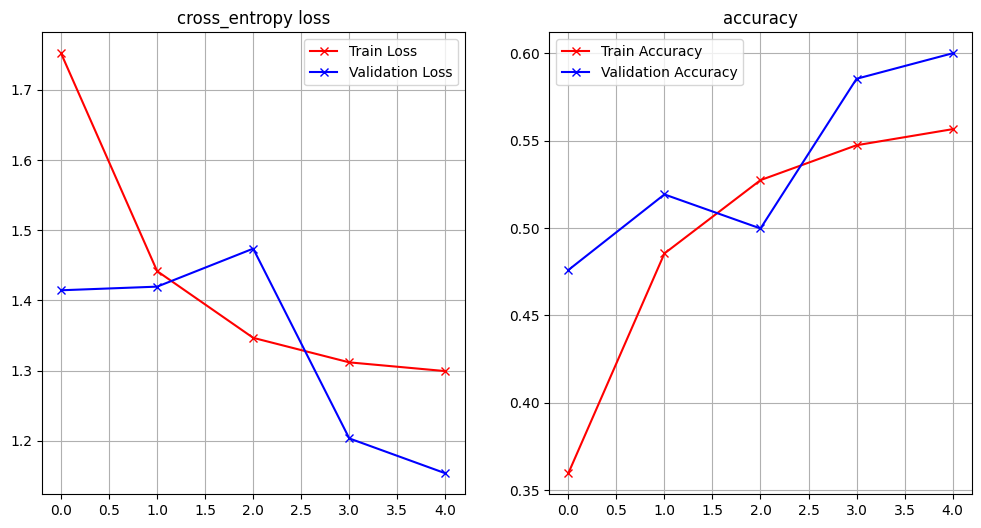

In [45]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The graph above shows the result of the sequential model made with the required pattern of functions inside. The model is composed of 6 conv2d function in which will process the images such as putting filters, convolutional computation, strides and padding. These parameters included in the function would process the images and extract the data which will be classified in the last layer of the model. Working or processing the images, the shape of these images were reduced per convolution function or when the data is being processed by one conv2d function. This method would be able for the model to classify the images included. Also, the epochs or the iterations would be the number that that the images would be inserted into the model for processing the data. The test accuracy and test loss are both below 70% which is not a good indicator for the model. However, seeing the graph above, the lines for accuracy and loss has almost the same form which means that both of these metrics are the same in values resulting to the kind of graph above. In addition, the graph shows a somehow curve-like structure which is a good indication that both metrics have the same results which means that the model is working properly with the data.

In [46]:
batch_size = 32

opt = keras.optimizers.Adam(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6054 - loss: 1.1405 - val_accuracy: 0.6553 - val_loss: 0.9867
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6298 - loss: 1.0537 - val_accuracy: 0.6608 - val_loss: 0.9748
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6491 - loss: 1.0079 - val_accuracy: 0.6757 - val_loss: 0.9197
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6529 - loss: 0.9877 - val_accuracy: 0.6804 - val_loss: 0.9084
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6652 - loss: 0.9552 - val_accuracy: 0.6945 - val_loss: 0.8793


In [47]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8792991638183594
Test accuracy: 0.6945000290870667


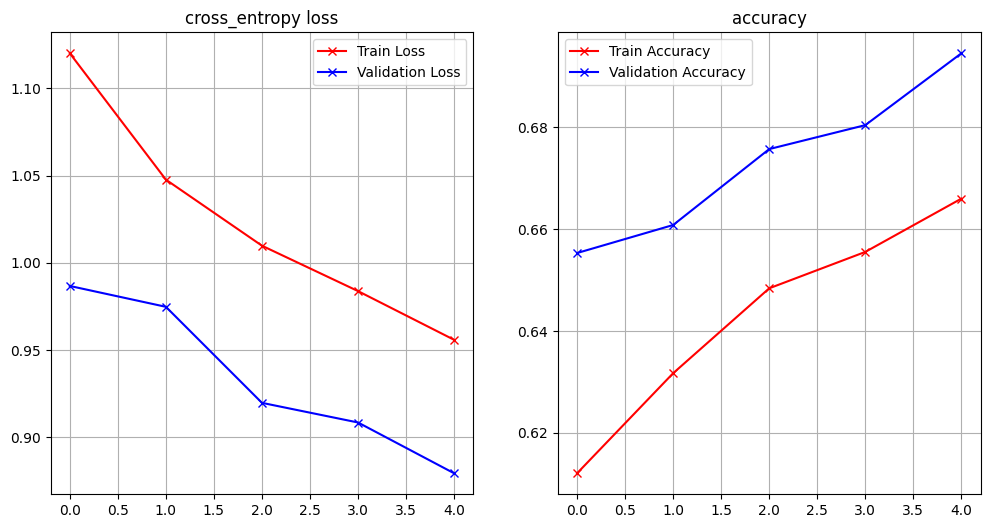

In [48]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The graph above shows a much more like linear graph. This could be mean that the accuracy and loss are not changing per iterations. The values per epochs doesn't have any changes resulting to a linear-look graph. Also, these graphs have the same model used which is the "model_1" but it has different optimizer, Adam. This optimizer is used since it is also good or can perform well in image data. Seeing the graph above, the linearity form of the graph could be a good sign or bad sign. Good sign because it indicates that the data or the result is constant and steadily improving the performance of the model to classify. While it can be indicated as a bad sign because the results are not changing (doesn't show any curve) especially that the data have variations. The test accuracy of the model (with Adam as its optimizer) is 69.41% while its test loss rate is 89.25%. These results is not enough to conclude that the model and its parameters did a good job in classifying the images.

In [49]:
#model2
model_2 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(64, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(128, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(24))
model_2.add(Activation('relu'))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [50]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 6, 6, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │        12,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,154 (3.38 MB)

 Trainable params: 887,154 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
batch_size = 200

opt = keras.optimizers.Adam(learning_rate=0.001)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.2142 - loss: 2.0452 - val_accuracy: 0.4691 - val_loss: 1.4419
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.4650 - loss: 1.4472 - val_accuracy: 0.5514 - val_loss: 1.2245
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.5594 - loss: 1.2241 - val_accuracy: 0.6305 - val_loss: 1.0497
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.6113 - loss: 1.0887 - val_accuracy: 0.6521 - val_loss: 0.9820
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.6477 - loss: 1.0017 - val_accuracy: 0.6841 - val_loss: 0.8964
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.6762 - loss: 0.9203 - val_accuracy: 0.7011 - val_loss: 0.8518
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.6913 - loss: 0.8805 - val_accuracy: 0.7148 - val_loss: 0.8226
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7069 - loss: 0.8373 - 

**Analysis:** The model used is a customization for trial and error and for the observation on how the functions work with the image data. This model has 15 epochs but retained the number of batch size which means that this model will run and process slowly and will take much time to finish. Also, this model has only 4 conv2d functions and the filters are increasing doubly. Based on the summary of the model, the shape of the images are changing as it goes down to the maxpooling2d function. This means that the model will classify small images in which have filters attached to it for a better extraction of feature and processing of these images.

In [52]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6993611454963684
Test accuracy: 0.760200023651123


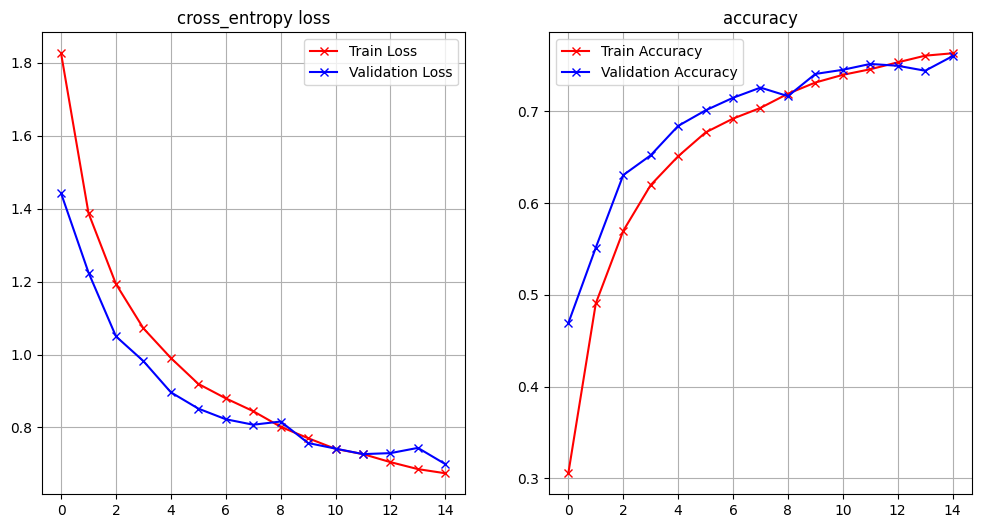

In [53]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The graph above shows the accuracy and loss of the created model. From the 15 epochs or iterations, both the metrics work properly since the results are not far off with each other. This can be proved through the curves of the graphs of the metrics. The blue and red lines are close to each other while maintaining its curve-like form. This means that the results or the model itself is generating a good results and classifies the data properly. The test accuracy obtained by the model is 75.06% while the test loss rate obtained is 72.76%. Seeing these results means that the model steadily maintaining its performance in processing and classifying the data that leads to generating results for both accuracy and loss close or not too far off with each other.

In [74]:
from keras import regularizers

In [75]:
#model3
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Dense(num_classes, activation='softmax'))   

c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [76]:
model_3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,708,074 (6.52 MB)

 Trainable params: 1,705,130 (6.50 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [77]:
batch_size = 200

opt = keras.optimizers.Adam(learning_rate=0.005)


model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=25,
              validation_data=(x_test, y_test))

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 238ms/step - accuracy: 0.3553 - loss: 1.9566 - val_accuracy: 0.1736 - val_loss: 3.4168
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.6157 - loss: 1.0994 - val_accuracy: 0.6125 - val_loss: 1.1508
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.7121 - loss: 0.8229 - val_accuracy: 0.7348 - val_loss: 0.8006
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.7607 - loss: 0.6820 - val_accuracy: 0.7282 - val_loss: 0.8182
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 238ms/step - accuracy: 0.7900 - loss: 0.6078 - val_accuracy: 0.7556 - val_loss: 0.7396
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.8141 - loss: 0.5334 - val_accuracy: 0.7725 - val_loss: 0.7185
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.8292 - loss: 0.4942 - val_accuracy: 0.7898 - val_loss: 0.6823
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.8477 - loss: 0

**Analysis:** The model used is a customization for trial and error and for the observation on how the functions work with the image data. This model has 100 epochs with 64 as its batch size which means that this model will run and process slowly and will take much time to finish. Also, this model has 8 conv2d functions and the filters are increasing doubly. Based on the summary of the model, the shape of the images are changing as it goes down to the maxpooling2d function just like the previous models. This means that the model will classify small images in which have filters attached to it for a better extraction of feature and processing of these images. But in the case of this model, the images are changed into a smaller size (if it will compared to the previous models) because increased number of maxpooling2d functions. With these the images that the model will classify would be small which may be better for the model to see the pixels properly and classify these images more efficiently.

In [78]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6113991737365723
Test accuracy: 0.8413000106811523


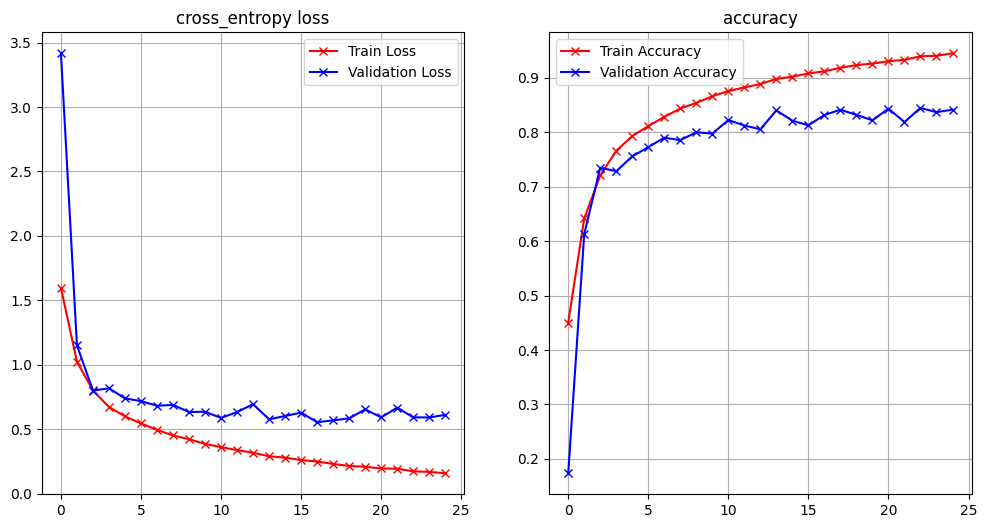

In [79]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The graph above shows the results of the model created with the use of the metrics, accuracy and loss. The training and validation of both metrics have different values since both lines part ways as the epochs or iterations increases. The results are fluctuating as the model process and classify the data with its functions. The blue lines (Validation) have an oscillating looking graph and it part ways with the red one. While the red lines (Training) have its good and consistent results which is increasing as the epochs or iterations increases as well as it doesn't show any oscillation in its curve lines. The training results could be mean that the model overfits or is overfitting but in the case of validation, the model have different results which means that the model have instances that it classifies the images incorrectly but majority of it is it classifies the images properly. The obtained test accuracy of the model is 84.14% while the test loss rate is 61.14%. Seeing this result, one may say that the results are not too far off with each other but the process between the epochs, shows fluctuation and huge gaps which are visualize through the graph, generating the graph above.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


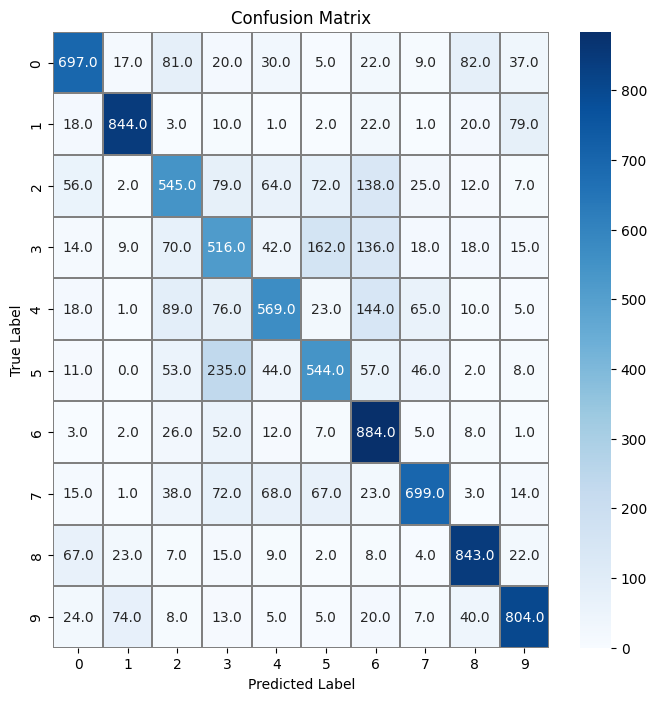

In [60]:
#model1
#confusion matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model_1.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Analysis:** The photo above shows the confusion matrix of the model. Based on the confusion matrix, there are values or images that were being classified as 0-9, either of those labels, in which the models should used to classify the images. Reading from the predicted label against the true label, there are images that the model accurately classified because the less numbers or values present the matrix. So far, the lowest value that the model obtained is 0 which means that the model classified the image included in that label correctly. However, there are still images that the model failed to classify correctly since there are still numbers (highest gained is 169 images) of images that were incorrectly classified by the model (the model predicted them as label 5 but their actual or true label is 3).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


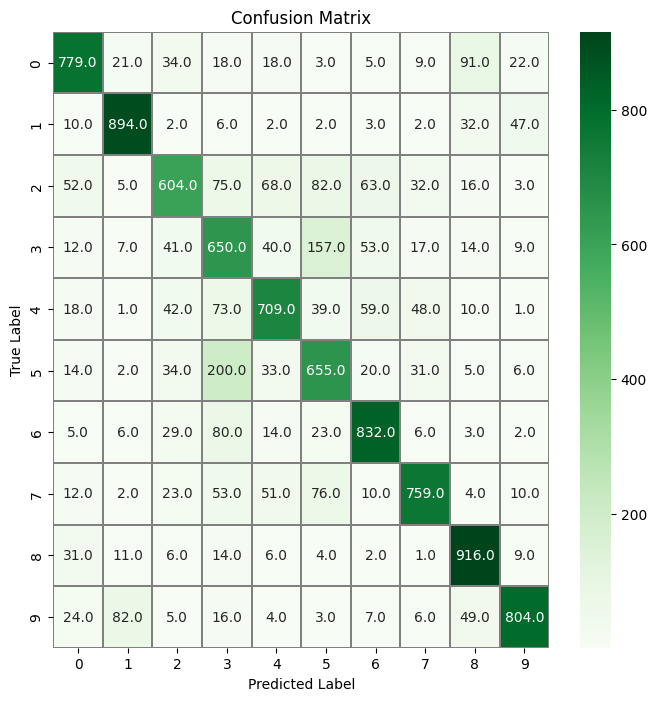

In [61]:
#model2
#confusion matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Analysis:** The photo above shows the confusion matrix of the model just like the confusion matrix above. Based on the confusion matrix, there are values or images that were being classified as 0-9, either of those labels, in which the models should used to classify the images. Reading from the predicted label against the true label, there are images that the model accurately classified because the less numbers or values present the matrix. So far, the lowest value that the model obtained is 2 which means that the model classified the image somehow correctly classified the images because of the lowest value present in the confusion matrix. However, there are still images that the model failed to classify correctly since there are still numbers (highest gained is 190 images) of images that were incorrectly classified by the model (the model predicted them as label 5 but their actual or true label is 3). If this will compared to the previous confusion matrix, the model have the same result which they inaccurately predicted label 3 as label 5 but this model have more images that incorrectly labeled than the previous one. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


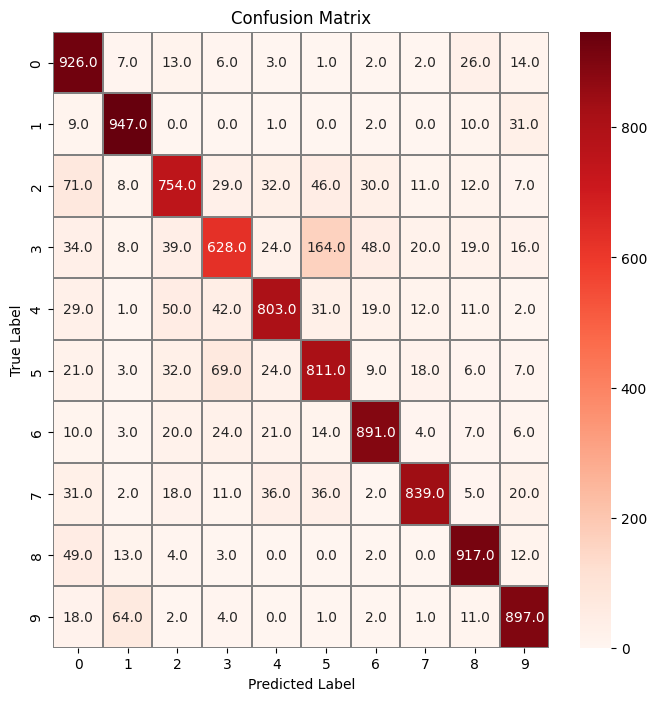

In [83]:
#model3
#confusion matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model_3.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Analysis:** The photo above shows the confusion matrix of the model just like the two previous confusion matrix above. Based on the confusion matrix, there are values or images that were being classified as 0-9, either of those labels, in which the models should used to classify the images. Reading from the predicted label against the true label, there are images that the model accurately classified because the less numbers or values present the matrix. So far, the lowest value that the model obtained is 0 which means that the model classified the image included in that label correctly. Also, there are some 0s that are present in the confusion matrix which gives the impression that the model has correctly identified or classified some labels with their true values or labels. However, there are still images that the model failed to classify correctly since there are still numbers (highest gained is 164 images) of images that were incorrectly classified by the model (the model predicted them as label 5 but their actual or true label is 3). If this will compared to the previous confusion matrix, the model have the same result which they inaccurately predicted label 3 as label 5 but this model have less images that incorrectly labeled than the previous one. 

In [63]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [64]:
import numpy as np
pred = model.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
[[1.4669717e-03 1.9794128e-04 1.4954795e-02 ... 2.5805668e-03
  8.4201415e-04 1.7429919e-04]
 [1.2277887e-02 7.2569095e-02 8.6191188e-09 ... 4.7664293e-11
  9.1190720e-01 3.2458042e-03]
 [3.5023859e-01 4.2801633e-02 1.4846153e-02 ... 5.0106603e-03
  3.9816073e-01 1.7875859e-01]
 ...
 [4.8593967e-05 1.6650578e-05 1.4093392e-02 ... 2.1283506e-01
  7.9386955e-06 5.0718219e-05]
 [5.9716692e-03 8.9231533e-01 1.7418006e-03 ... 2.2436952e-02
  1.1910036e-03 3.4878530e-02]
 [1.2583740e-06 4.5019578e-07 1.2508039e-04 ... 9.6708494e-01
  1.5652695e-08 4.2688216e-06]]
[3 8 8 ... 5 1 7]


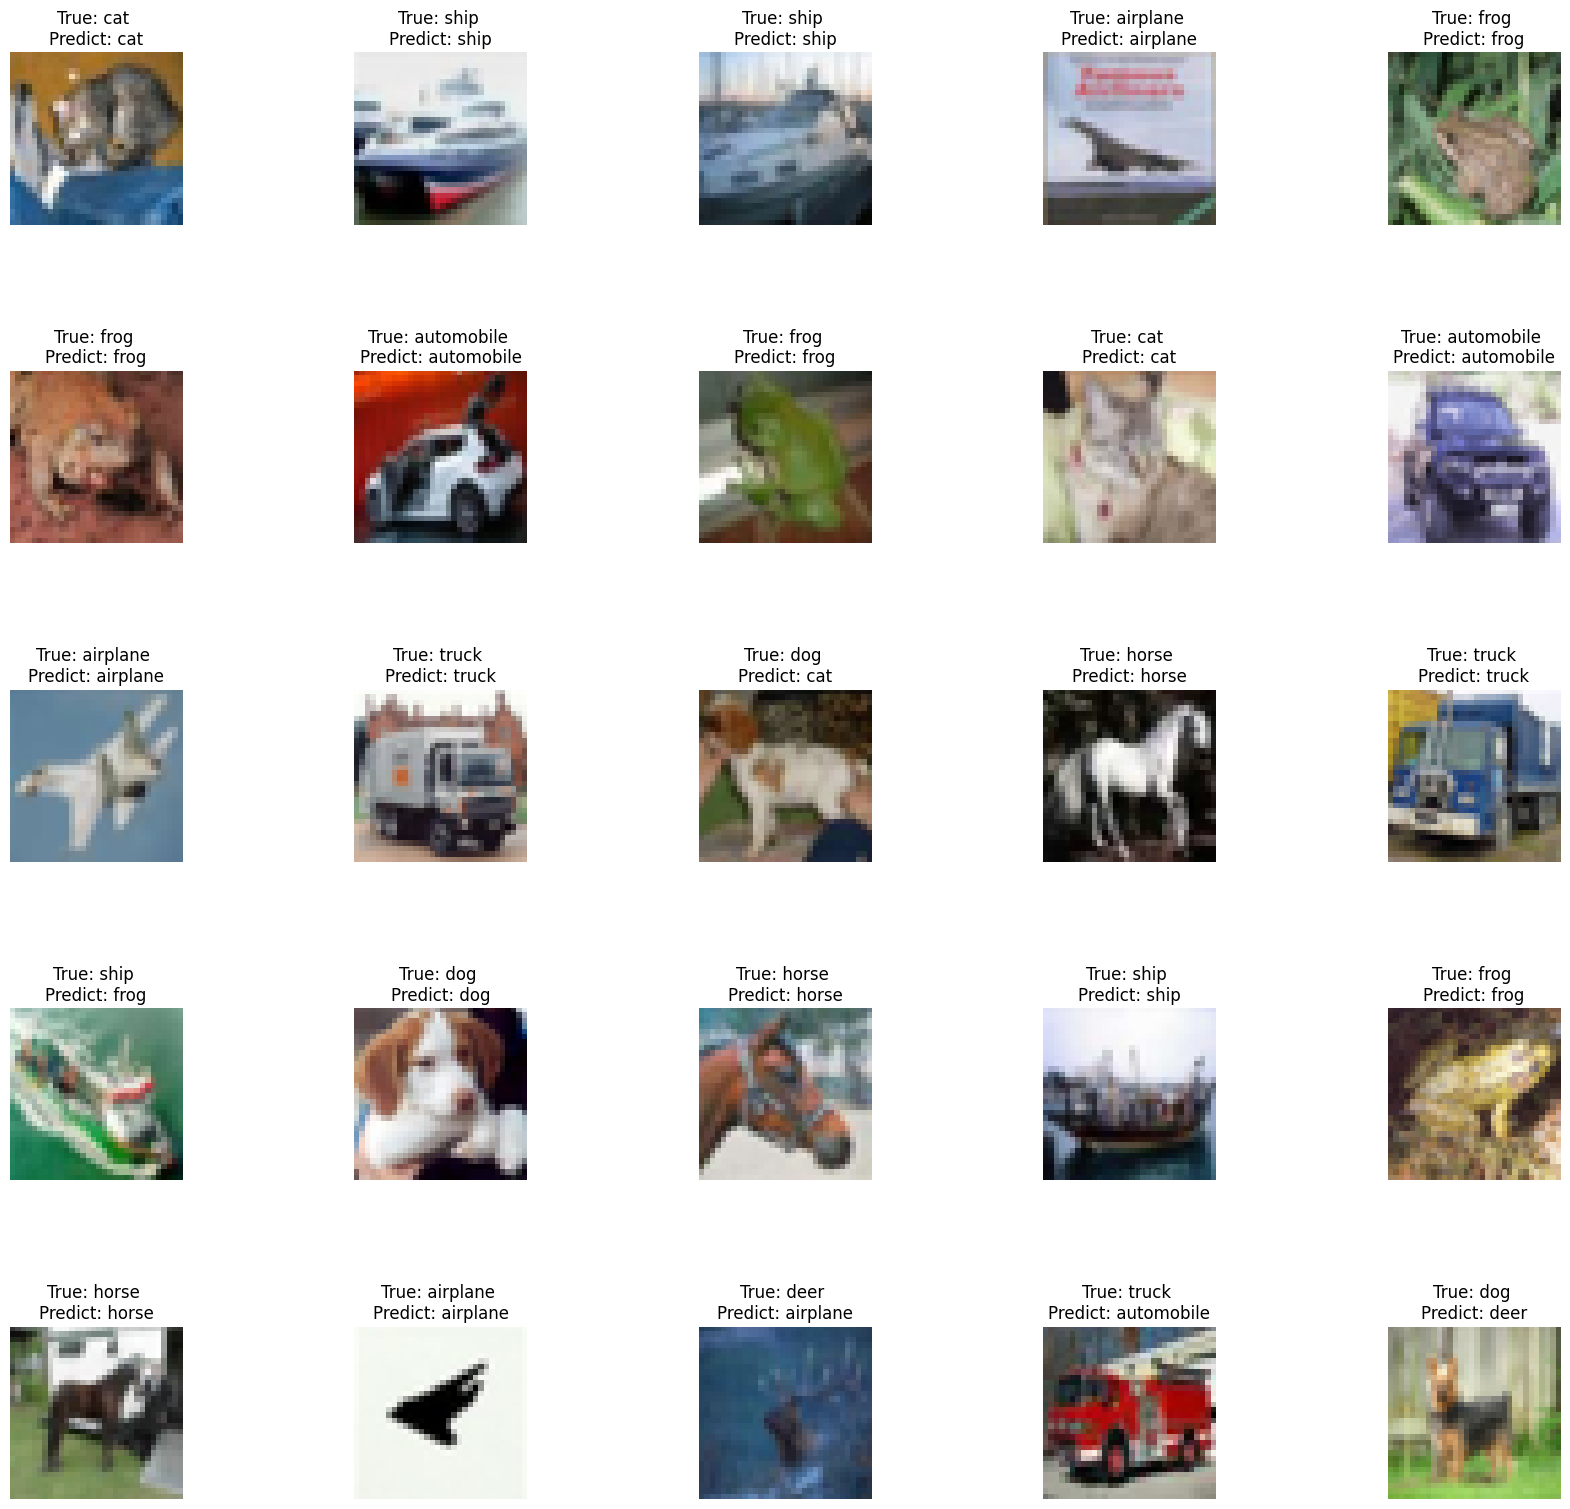

In [65]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Analysis:** The image above shows the visualization on how the model will predict certain images present. The image above shows the true label as well as the predicted label of the model. Through this visualization, one can notice how the model correctly classify the images. It is shown in the image above that there is only one image that the model incorrectly identified or predicted which somehow justified the model's performance. Some of the image that the model incorrectly classified are deer which is predicted or labeled as airplane, truck as an automobile, and dog as a deer.

In [66]:
pred = model_1.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.4998893e-03 2.4878986e-03 3.6739092e-02 ... 4.1062860e-03
  2.9313872e-02 2.0512454e-03]
 [1.1573844e-02 5.7317852e-03 3.3533966e-04 ... 1.6095034e-06
  9.8064661e-01 8.0278871e-04]
 [1.3106386e-01 1.1632675e-01 3.1224217e-03 ... 2.0641123e-04
  7.1796906e-01 2.6670799e-02]
 ...
 [1.5839887e-05 6.5597749e-07 1.1519418e-02 ... 3.1425748e-02
  2.7092033e-06 5.4526940e-06]
 [1.5879144e-01 2.3779584e-02 1.5485387e-01 ... 3.6742244e-02
  1.0897289e-02 1.2483869e-02]
 [1.7115657e-05 9.4285353e-09 4.0590923e-04 ... 7.9445630e-01
  3.9069596e-09 6.1524446e-07]]
[3 8 8 ... 5 4 7]


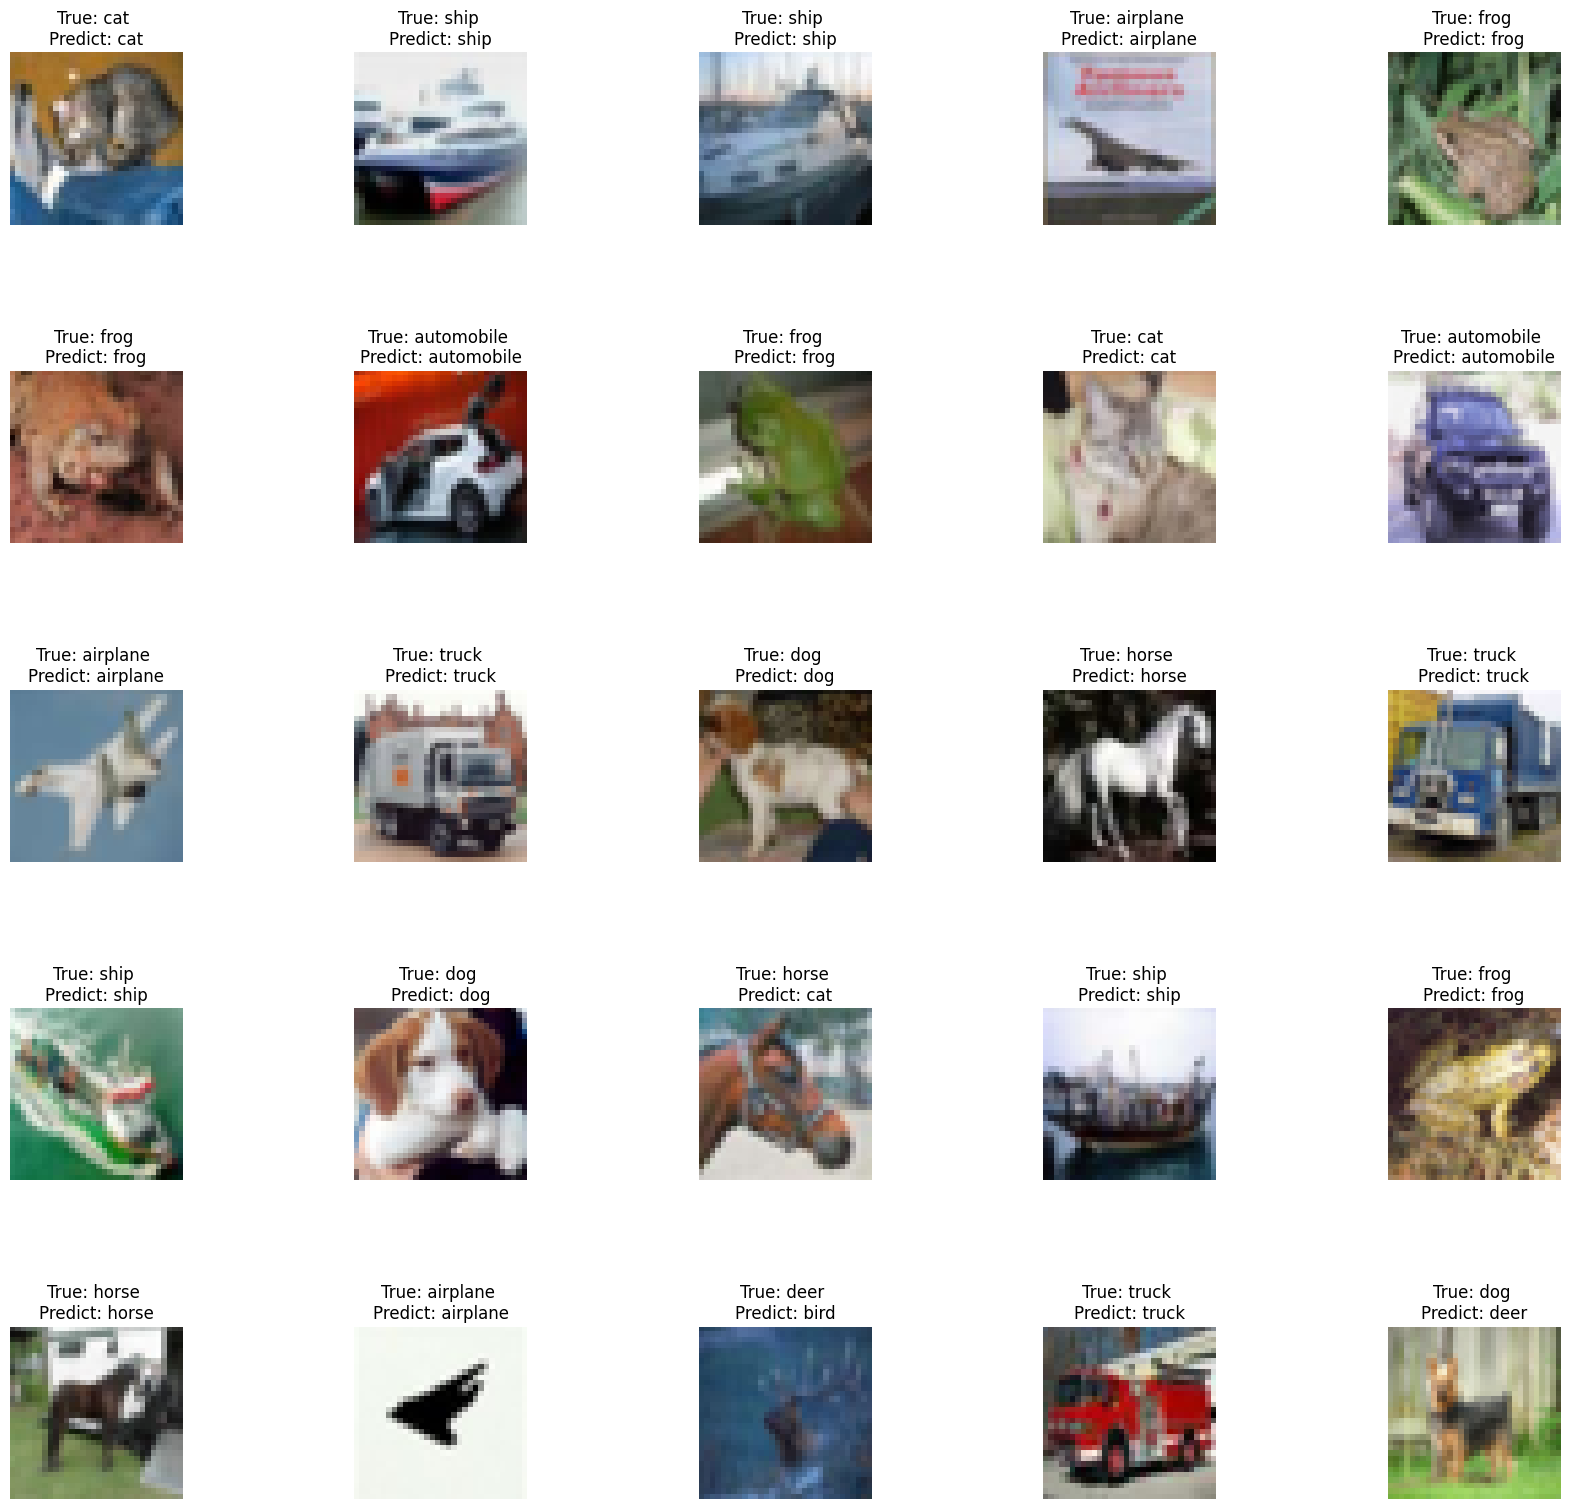

In [67]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Analysis:** The image above shows the visualization on how the model will predict certain images present. The image above shows the true label as well as the predicted label of the model. Through this visualization, one can notice how the model correctly classify the images. It is shown in the image above that there is only one image that the model incorrectly identified or predicted which somehow justified the model's performance, which is predicting or labeling the dog as a deer.

In [68]:
pred = model_2.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[9.7180428e-03 7.4737944e-04 4.7080599e-02 ... 1.1121903e-02
  8.7315040e-03 1.2542031e-03]
 [7.1795349e-04 1.6109952e-04 2.5950027e-07 ... 2.0529238e-09
  9.9911803e-01 2.4552846e-06]
 [8.1943333e-02 5.4489542e-02 2.3783378e-03 ... 5.3560873e-04
  8.4886843e-01 9.1600232e-03]
 ...
 [1.4165295e-06 6.0732043e-07 7.1317272e-04 ... 2.2907029e-03
  8.6844591e-07 1.9201352e-06]
 [9.7386017e-02 8.5410702e-01 4.8652212e-03 ... 7.5540721e-04
  2.5797462e-02 9.1915140e-03]
 [1.0115720e-07 4.7253751e-10 3.7294024e-06 ... 9.6729797e-01
  1.4045880e-09 6.6241350e-09]]
[3 8 8 ... 5 1 7]


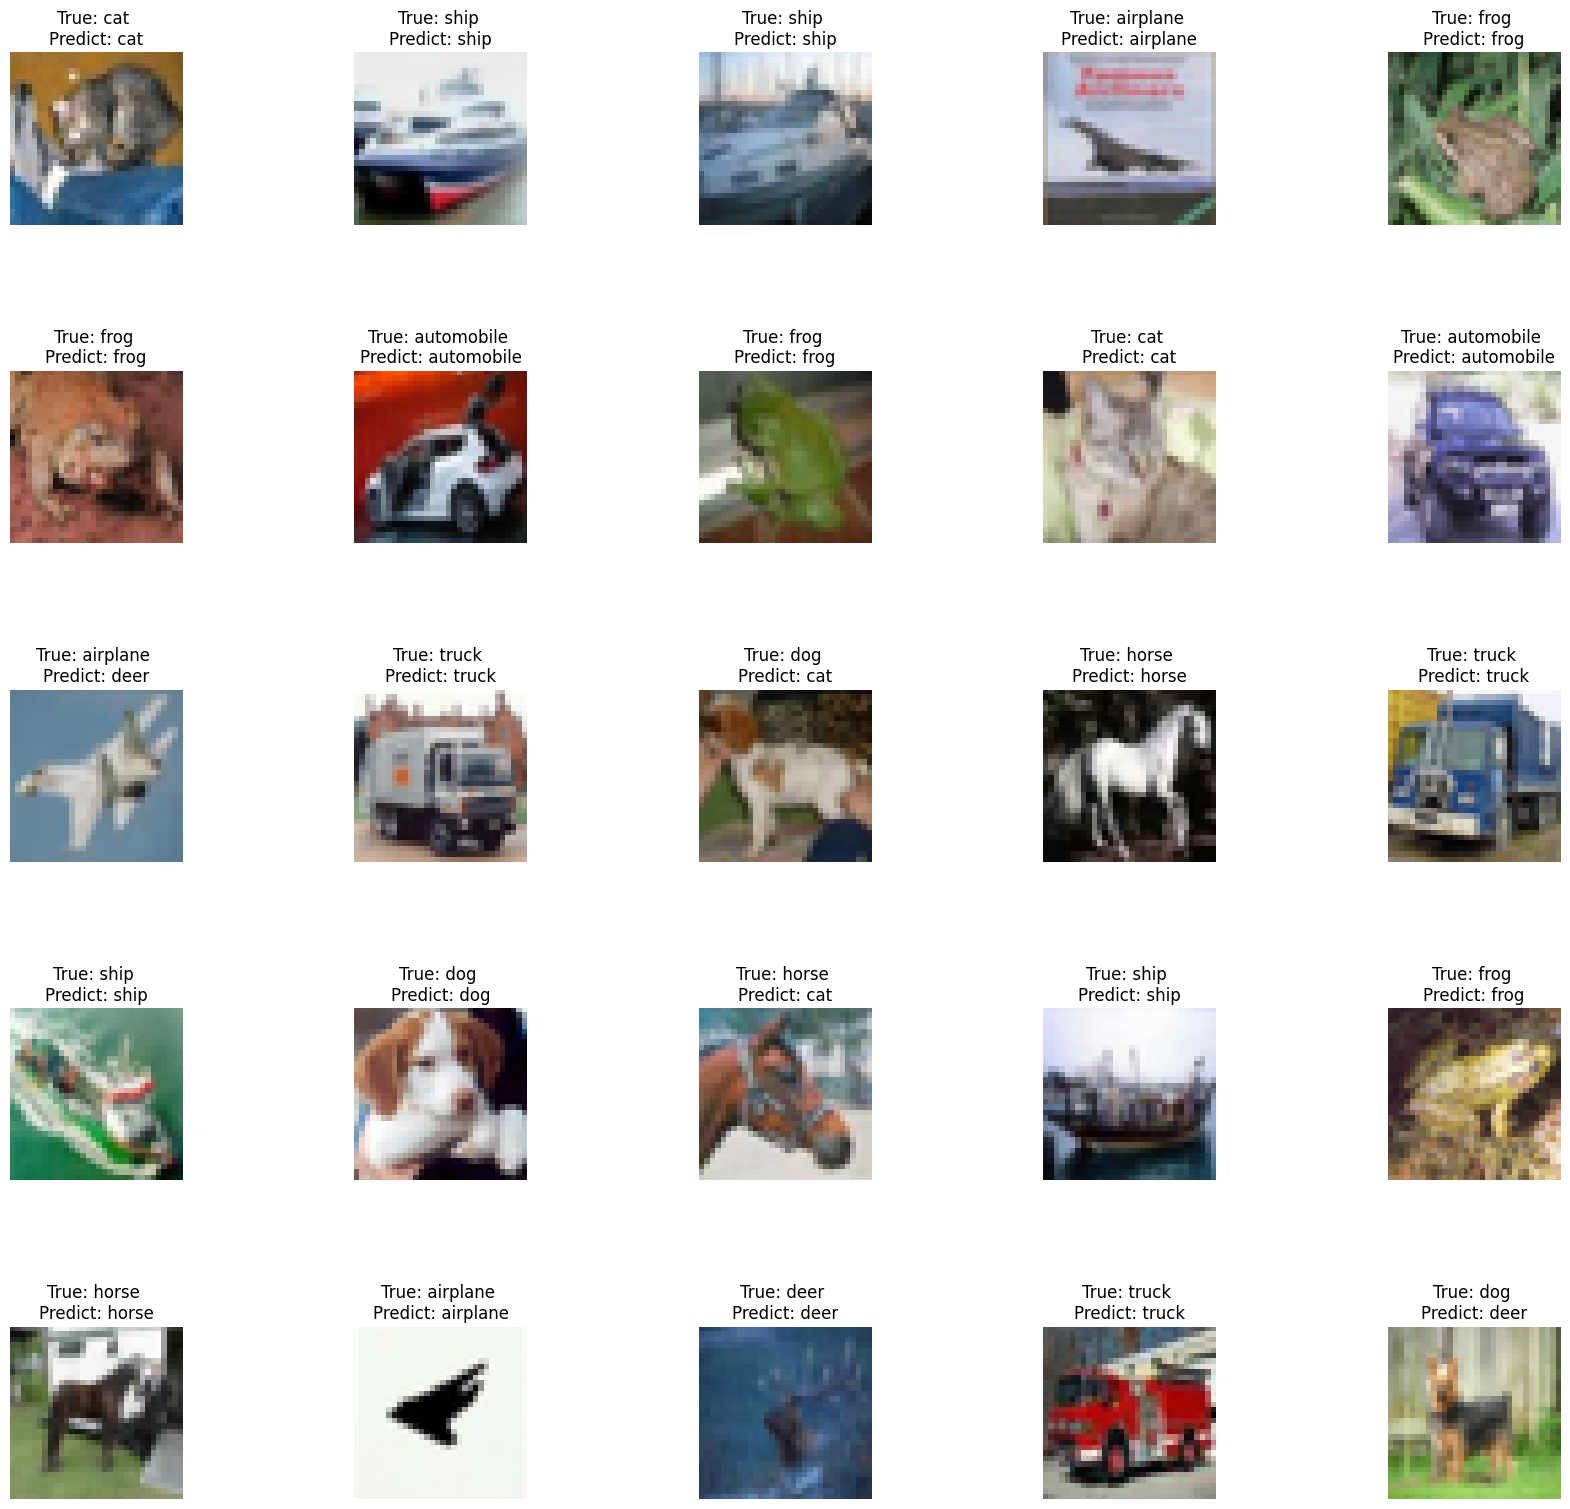

In [69]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Analysis:** The image above shows the visualization on how the model will predict certain images present. The image above shows the true label as well as the predicted label of the model. Through this visualization, one can notice how the model correctly classify the images. It is shown in the image above that there is only one image that the model incorrectly identified or predicted which somehow justified the model's performance, which is also the same as the above model in which classifying an image of a dog as a deer.

In [81]:
pred = model_3.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[7.5709555e-05 1.7321290e-05 3.1180779e-04 ... 3.1872510e-06
  1.2342648e-05 2.7350921e-05]
 [2.6284144e-05 1.1174818e-02 3.7007575e-10 ... 3.1293097e-11
  9.8879123e-01 7.6514862e-06]
 [2.8091928e-04 1.5610468e-03 1.7024856e-08 ... 5.5252508e-10
  9.9811578e-01 4.2244421e-05]
 ...
 [3.6067961e-11 1.5678425e-09 1.2588464e-08 ... 7.5656912e-09
  1.6584342e-09 1.0823521e-10]
 [4.5001312e-07 9.9999785e-01 1.2844018e-12 ... 9.8170951e-13
  1.8199547e-08 1.6246539e-06]
 [3.0229613e-10 3.2414771e-09 5.7694535e-08 ... 9.9999690e-01
  6.6970823e-10 7.6124937e-09]]
[3 8 8 ... 5 1 7]


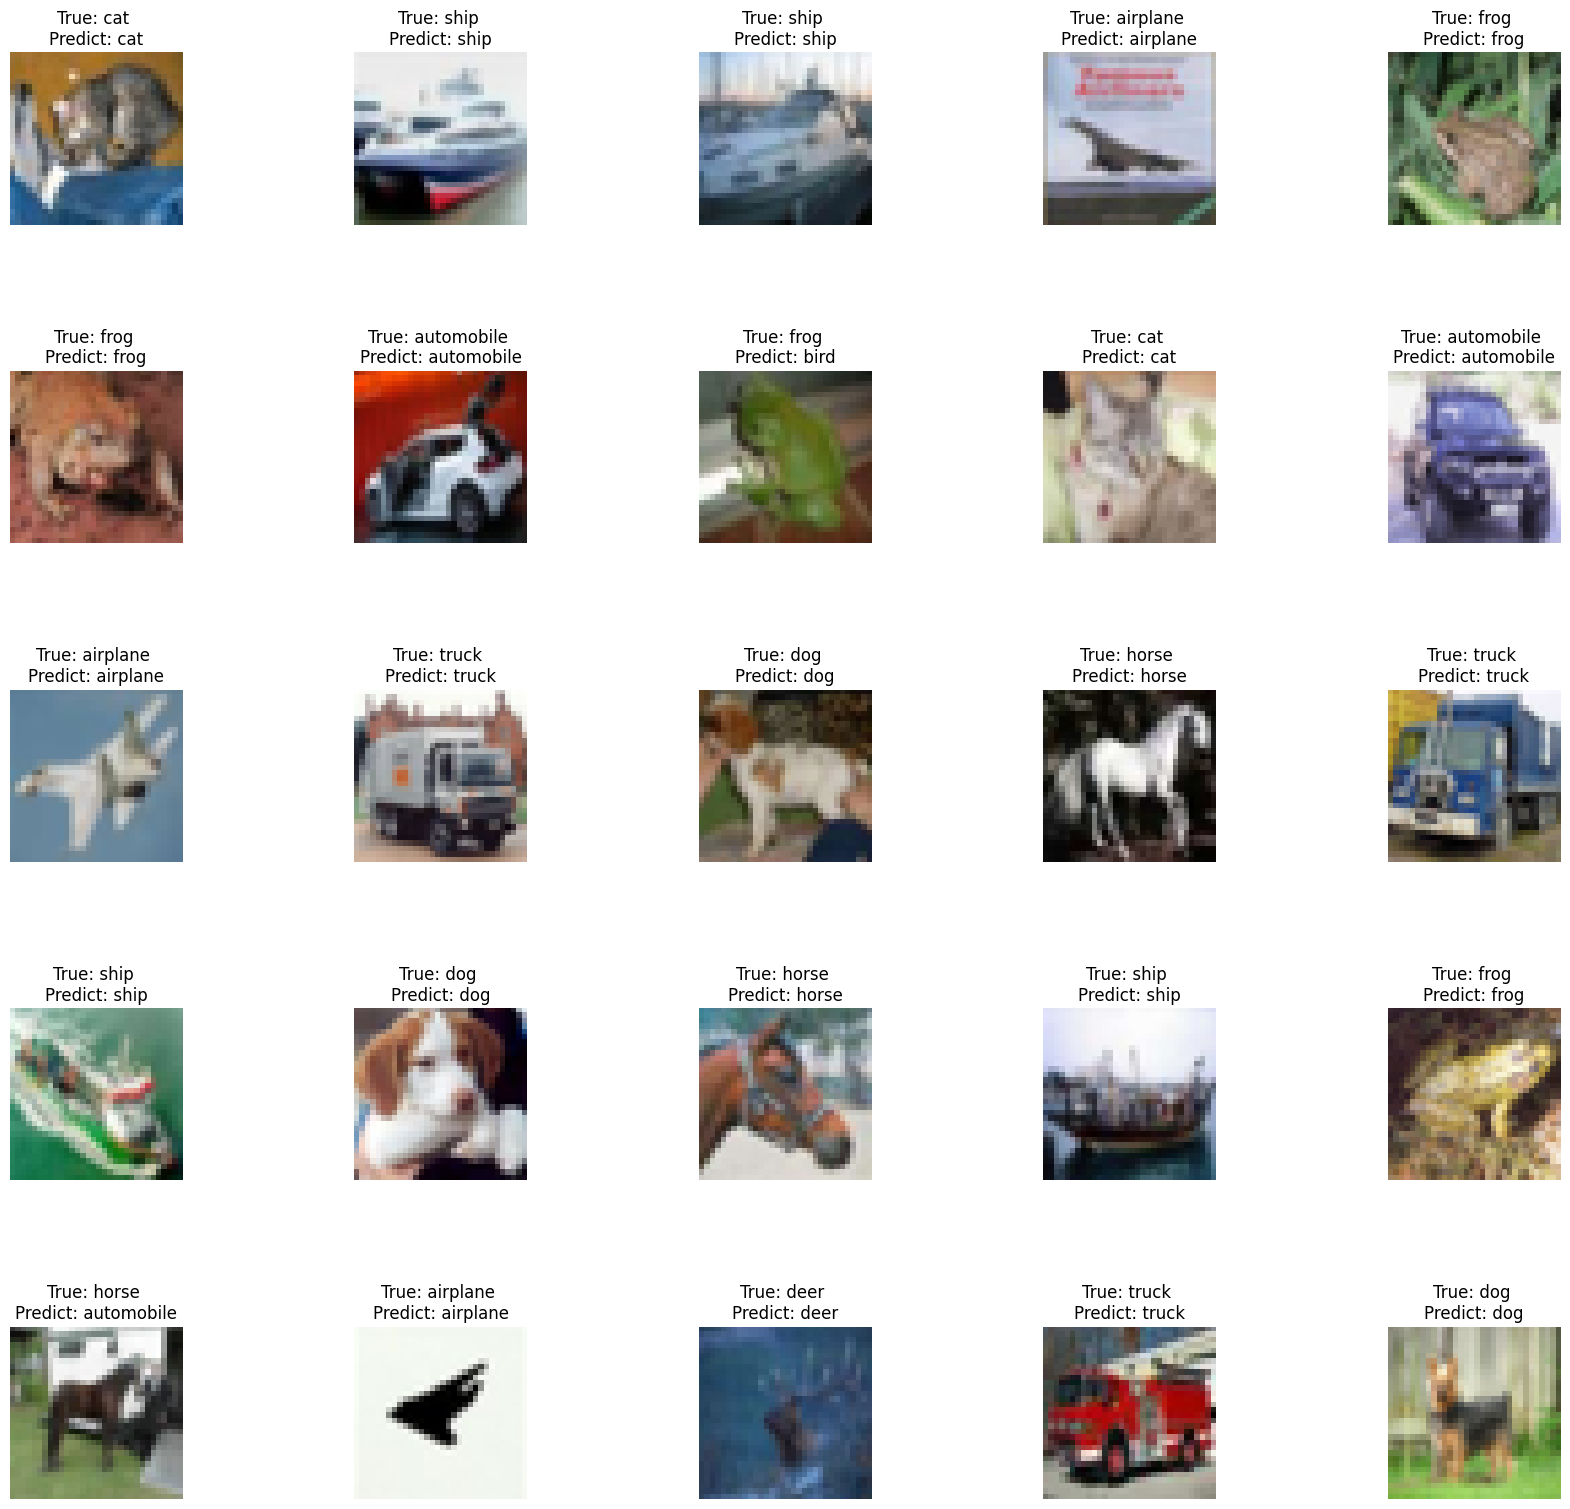

In [82]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Analysis:** The image above shows the visualization on how the model will predict certain images present. The image above shows the true label as well as the predicted label of the model. Through this visualization, one can notice how the model correctly classify the images. It is shown in the image above that there is only one image that the model incorrectly identified or predicted which somehow justified the model's performance which in this case, predicted or labeled the image of a horse as an automobile. 

## Conclusion

This activity serves as our practice and experiment in terms of learning and observing convolutional neural network through creating a model. Doing the task as well as creating the architecture of the model would be a big help for us to further understand neural networks. Since this activity deals with cifar10 as its data which is composed of various images that can be used for the model to test in terms of classification. The functions are used to process the images which will enhanced the image pixels in order for the model to classify the images properly and accurately. Functions such as the conv2d, maxpooling2d, and flatten are the necessary functions that processed the images in order for the model to further classify the data. Also, putting filters into the images would create a big difference on the pixels which the model will process and classify. Filters for this context is the dimension of the output and it performs of operations that would change the input pixels because of the added filters. The model named "model" follows the required pattern of functions and number of epochs which should be deployed or run. The other models were customized or made based on the preferences and trial and error to see if there will be any changes and if this will increase the accuracy of the model. Overall, this activity serves our way in order to enhance our skills and further understand the concept of deep learning and how it works in terms of processing the data. Learning this concept would be a stepping stone in enhancing our skills in creating models and processing data for an efficient prediction of a certain event.

#### ***“I affirm that I have not given or received any unauthorized help on this exam, and that this work is my own.”***

Colab Link: https://colab.research.google.com/drive/10Hy7WZ4pJDC9LF6rZMYMJHi9rMmyfaGO?usp=sharing